In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/Transfer_Learning/512_original/'
train_dir = '/home/skhatter/Transfer_Learning/512_original/train'
valid_dir = '/home/skhatter/Transfer_Learning/512_original/validation'

train_dam_dir = '/home/skhatter/Transfer_Learning/512_original/train/damaged'
train_undam_dir = '/home/skhatter/Transfer_Learning/512_original/train/undamaged'

valid_dam_dir = '/home/skhatter/Transfer_Learning/512_original/validation/damaged'
valid_undam_dir = '/home/skhatter/Transfer_Learning/512_original/validation/undamaged'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

Total training damaged images 1501
Total training undamaged images 2541
Total validation damaged images 26
Total validation undamaged images 21


In [4]:
from keras import layers
from keras import models
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape=(512, 512, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [8]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 48,269,633
Trainable params: 40,634,369
Non-trainable params: 7,635,264
_________________________________________________________________


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255)


train_generator = datagen.flow_from_directory(train_dir,
                                             target_size = (512, 512), 
                                              batch_size = 20,
                                              class_mode = 'binary')


validation_generator = datagen.flow_from_directory(valid_dir,
                                             target_size = (512, 512), 
                                              batch_size = 20,
                                              class_mode = 'binary')
                                              

Found 4040 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [10]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=50,
                    epochs=100,  
                    validation_data=validation_generator,
                   validation_steps = 25)

Epoch 1/100
50/50 [==============================] - 51s - loss: 0.7738 - acc: 0.5980 - val_loss: 0.6665 - val_acc: 0.4632
Epoch 2/100
50/50 [==============================] - 47s - loss: 0.4781 - acc: 0.7980 - val_loss: 0.2713 - val_acc: 0.9123
Epoch 3/100
50/50 [==============================] - 47s - loss: 0.3838 - acc: 0.8570 - val_loss: 0.2332 - val_acc: 0.9132
Epoch 4/100
50/50 [==============================] - 47s - loss: 0.3179 - acc: 0.8820 - val_loss: 0.1256 - val_acc: 0.9553
Epoch 5/100
50/50 [==============================] - 47s - loss: 0.2560 - acc: 0.9130 - val_loss: 0.1170 - val_acc: 0.9562
Epoch 6/100
50/50 [==============================] - 47s - loss: 0.2208 - acc: 0.9210 - val_loss: 0.3316 - val_acc: 0.9053
Epoch 7/100
50/50 [==============================] - 47s - loss: 0.2160 - acc: 0.9340 - val_loss: 0.1291 - val_acc: 0.9526
Epoch 8/100
50/50 [==============================] - 47s - loss: 0.2010 - acc: 0.9360 - val_loss: 0.1251 - val_acc: 0.9781
Epoch 9/100
50/5

50/50 [==============================] - 47s - loss: 0.0595 - acc: 0.9890 - val_loss: 0.1069 - val_acc: 0.9763
Epoch 68/100
50/50 [==============================] - 47s - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0469 - val_acc: 0.9781
Epoch 69/100
50/50 [==============================] - 47s - loss: 0.0511 - acc: 0.9950 - val_loss: 0.2970 - val_acc: 0.9763
Epoch 70/100
50/50 [==============================] - 47s - loss: 0.0884 - acc: 0.9920 - val_loss: 0.2089 - val_acc: 0.9526
Epoch 71/100
50/50 [==============================] - 47s - loss: 0.1406 - acc: 0.9790 - val_loss: 0.1457 - val_acc: 0.9781
Epoch 72/100
50/50 [==============================] - 47s - loss: 0.0361 - acc: 0.9970 - val_loss: 0.2703 - val_acc: 0.9763
Epoch 73/100
50/50 [==============================] - 47s - loss: 0.0599 - acc: 0.9960 - val_loss: 0.7239 - val_acc: 0.9342
Epoch 74/100
50/50 [==============================] - 47s - loss: 0.0689 - acc: 0.9920 - val_loss: 0.1571 - val_acc: 0.9781
Epoch 75/100
50/50 [=

In [11]:
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_3_vgg.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


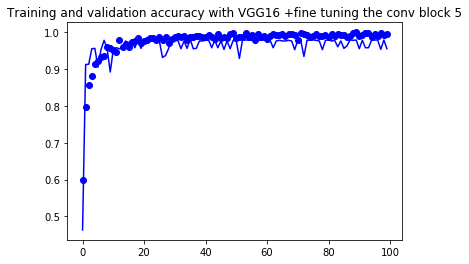

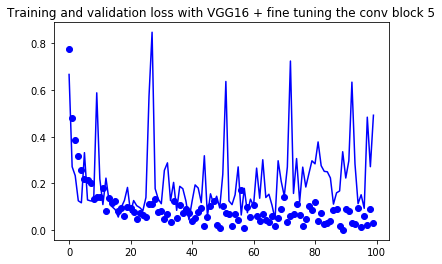

In [12]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy with VGG16 +fine tuning the conv block 5')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss with VGG16 + fine tuning the conv block 5')
plt.show()